# Clean Open Street Map
Open Street Map (https://www.openstreetmap.org/) provides a open source resource to identify buildings, roads, amenities, and infrastructure in a community.

This notebook will demonstrate the pontial for identifying school buildings in a community.

   
    1. Read in Open Street Map Data
    2. Check to make sure data has a unique id
    
    
 Guide to obtaining OpenStreetMap data in python:
 - https://automating-gis-processes.github.io/CSC/notebooks/L3/retrieve_osm_data.html
 - https://osmnx.readthedocs.io/en/stable/
> Boeing, G. 2017. OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks. Computers, Environment and Urban Systems 65, 126-139. doi:10.1016/j.compenvurbsys.2017.05.004

## Description of Program
- program:    IN-CORE_1dv2_Lumberton_CleanOpenStreeMap
- task:       Read in school locations from Open Street Map
- Version:    2021-06-21
- project:    Interdependent Networked Community Resilience Modeling Environment (IN-CORE) Subtask 5.2 - Social Institutions
- funding:	  NIST Financial Assistance Award Numbers: 70NANB15H044 and 70NANB20H008 
- author:     Nathanael Rosenheim

- Suggested Citation:
Rosenheim, N. (2021) “Obtain, Clean, and Explore Labor Market Allocation Methods". 
Archived on Github and ICPSR.

In [1]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import osmnx as ox  # OpenStreetMap Network - download OSM data
import folium as fm # folium has more dynamic maps - but requires internet connection

import os # For saving output to path

In [2]:
# Display versions being used - important information for replication
import sys
print("Python Version     ", sys.version)
print("geopandas version: ", gpd.__version__)
print("pandas version:    ", pd.__version__)
print("osmnx version:     ", ox.__version__)
print("folium version:    ", fm.__version__)

Python Version      3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 15:37:01) [MSC v.1916 64 bit (AMD64)]
geopandas version:  0.9.0
pandas version:     1.2.4
osmnx version:      1.1.1
folium version:     0.12.1


In [3]:
# Store Program Name for output files to have the same name
programname = "IN-CORE_1dv2_Lumberton_CleanOpenStreeMap_2021-06-21"
# Make directory to save output
if not os.path.exists(programname):
    os.mkdir(programname)

## Setup access to IN-CORE
https://incore.ncsa.illinois.edu/ 

In [4]:
from pyincore import IncoreClient, Dataset, FragilityService, MappingSet, DataService
from pyincore_viz.geoutil import GeoUtil as viz

In [5]:
#client = IncoreClient()
# IN-CORE chaches files on the local machine, it might be necessary to clear the memory
#client.clear_cache()

In [6]:
# create data_service object for loading files
#data_service = DataService(client)

## Read in Open Street Map School Data

https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=from_place#osmnx.geometries.geometries_from_place


In [7]:
ox.config(log_console=True)
ox.__version__

'1.1.1'

In [8]:
# Specify the name that is used to seach for the data
place_name = "Robeson County, North Carolina, USA"

# download/model a street network for some city then visualize it
osm_schools = ox.geometries.geometries_from_place(query = place_name, 
                                       tags = {'amenity':['school']} )
osm_schools

amenity  ele gnis:county_id gnis:created  \
element_type osmid                                                
node         357767730  school   43            155   06/17/1980   
             357771489  school   59            155   06/17/1980   
             357772472  school   38            155   06/17/1980   
             357774000  school   42            155   06/17/1980   
             357774969  school   43            155   06/17/1980   
...                        ...  ...            ...          ...   
             357814481  school   53            155   11/10/2008   
way          428732906  school  NaN            NaN          NaN   
             428732910  school  NaN            NaN          NaN   
             697635437  school  NaN            NaN          NaN   
             925917089  school  NaN            NaN          NaN   

                       gnis:feature_id gnis:state_id  \
element_type osmid                                     
node         357767730          980556            37   
             357771489          984036            37   
             357772472          984904            37   
             357774000          986056            37   
             357774969          986841            37   
...                                ...           ...   
             357814481         2505270            37   
way          428732906         1024815           NaN   
             428732910          993241           NaN   
             697635437             NaN           NaN   
             925917089             NaN           NaN   

                                                                     name  \
element_type osmid                                                          
node         357767730                              Barker Tenmile School   
             357771489                                        Dean School   
             357772472                                   Fairgrove School   
             357774000                                 Green Grove School   
             357774969                                Hilly Branch School   
...                                                                   ...   
             357814481  University of North Carolina - Pembroke Campus...   
way          428732906                         Oxendine Elementary School   
             428732910                      Rex-Rennert Elementary School   
             697635437                                                NaN   
             925917089                              St Paul's High School   

                                                                 geometry  \
element_type osmid                                                          
node         357767730                         POINT (-78.95225 34.71183)   
             357771489                         POINT (-79.34476 34.73183)   
             357772472                         POINT (-79.17365 34.49294)   
             357774000                         POINT (-79.14309 34.55739)   
             357774969                         POINT (-79.12309 34.59044)   
...                                                                   ...   
             357814481                         POINT (-79.20280 34.68690)   
way          428732906  POLYGON ((-79.25910 34.80702, -79.25896 34.807...   
             428732910  POLYGON ((-79.08999 34.84485, -79.08762 34.845...   
             697635437  POLYGON ((-79.01061 34.46563, -79.01159 34.465...   
             925917089  POLYGON ((-78.97796 34.81358, -78.97714 34.813...   

                                                       website fixme  \
element_type osmid                                                     
node         357767730                                     NaN   NaN   
             357771489                                     NaN   NaN   
             357772472                                     NaN   NaN   
             357774000                                    

## Check Unique ID

ID must be unique and non-missing.

In [9]:
# move unique id from index to column
#help(pd.DataFrame.reset_index)
osm_schools.reset_index(inplace = True)
osm_schools.head()

C:\Users\nathanael99\Miniconda3\envs\pyincoreEnv20210506\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,element_type,osmid,amenity,ele,gnis:county_id,gnis:created,gnis:feature_id,gnis:state_id,name,geometry,...,addr:city,addr:housenumber,addr:postcode,addr:state,addr:street,note,source,nodes,old_name,phone
0,node,357767730,school,43,155,06/17/1980,980556,37,Barker Tenmile School,POINT (-78.95225 34.71183),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,357771489,school,59,155,06/17/1980,984036,37,Dean School,POINT (-79.34476 34.73183),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,357772472,school,38,155,06/17/1980,984904,37,Fairgrove School,POINT (-79.17365 34.49294),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,357774000,school,42,155,06/17/1980,986056,37,Green Grove School,POINT (-79.14309 34.55739),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,357774969,school,43,155,06/17/1980,986841,37,Hilly Branch School,POINT (-79.12309 34.59044),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Count the number of Unique Values
osm_schools['osmid'].describe()

C:\Users\nathanael99\Miniconda3\envs\pyincoreEnv20210506\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    7.700000e+01
mean     3.714318e+08
std      7.556799e+07
min      3.577677e+08
25%      3.577865e+08
50%      3.577994e+08
75%      3.578145e+08
max      9.259171e+08
Name: osmid, dtype: float64

In [11]:
# Count the number of Unique Values
osm_schools['osmid'].nunique()

77

In [12]:
# Are there any missing values for the unique id?
osm_schools.loc[osm_schools['osmid'].isnull()]

,element_type,osmid,amenity,ele,gnis:county_id,gnis:created,gnis:feature_id,gnis:state_id,name,geometry,...,addr:city,addr:housenumber,addr:postcode,addr:state,addr:street,note,source,nodes,old_name,phone


In [13]:
# Move Primary Key Column Building ID to first Column
cols = ['osmid']  + [col for col in osm_schools if col != 'osmid']
cols
osm_schools = osm_schools[cols]
osm_schools.head()

C:\Users\nathanael99\Miniconda3\envs\pyincoreEnv20210506\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,osmid,element_type,amenity,ele,gnis:county_id,gnis:created,gnis:feature_id,gnis:state_id,name,geometry,...,addr:city,addr:housenumber,addr:postcode,addr:state,addr:street,note,source,nodes,old_name,phone
0,357767730,node,school,43,155,06/17/1980,980556,37,Barker Tenmile School,POINT (-78.95225 34.71183),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,357771489,node,school,59,155,06/17/1980,984036,37,Dean School,POINT (-79.34476 34.73183),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,357772472,node,school,38,155,06/17/1980,984904,37,Fairgrove School,POINT (-79.17365 34.49294),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,357774000,node,school,42,155,06/17/1980,986056,37,Green Grove School,POINT (-79.14309 34.55739),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,357774969,node,school,43,155,06/17/1980,986841,37,Hilly Branch School,POINT (-79.12309 34.59044),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Confirm Building ID is Unique and Non-Missing
# Describe a string value to get count and unique values
summary_statistics =  osm_schools['osmid'].apply(lambda x: str(x)).describe()
print(summary_statistics)

count            77
unique           77
top       357774000
freq              1
Name: osmid, dtype: object


C:\Users\nathanael99\Miniconda3\envs\pyincoreEnv20210506\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## How many unique school details


In [15]:
summary_statistics = osm_schools['name'].describe()
print(summary_statistics)

count                                76
unique                               76
top       Saint Pauls Elementary School
freq                                  1
Name: name, dtype: object


C:\Users\nathanael99\Miniconda3\envs\pyincoreEnv20210506\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# Available columns
columns = osm_schools.columns
print(columns)

Index(['osmid', 'element_type', 'amenity', 'ele', 'gnis:county_id',
       'gnis:created', 'gnis:feature_id', 'gnis:state_id', 'name', 'geometry',
       'website', 'fixme', 'addr:city', 'addr:housenumber', 'addr:postcode',
       'addr:state', 'addr:street', 'note', 'source', 'nodes', 'old_name',
       'phone'],
      dtype='object')


C:\Users\nathanael99\Miniconda3\envs\pyincoreEnv20210506\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
osm_schools.groupby('element_type').count()

,osmid,amenity,ele,gnis:county_id,gnis:created,gnis:feature_id,gnis:state_id,name,geometry,website,...,addr:city,addr:housenumber,addr:postcode,addr:state,addr:street,note,source,nodes,old_name,phone
element_type,,,,,,,,,,,,,,,,,,,,,
node,73,73,73,73,73,73,73,73,73,2,...,1,1,1,1,1,1,1,0,0,0
way,4,4,0,0,0,2,0,3,4,2,...,2,2,2,0,2,0,0,4,1,2


## Explore Data

C:\Users\nathanael99\Miniconda3\envs\pyincoreEnv20210506\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Open Street Map School Data for Robeson County]


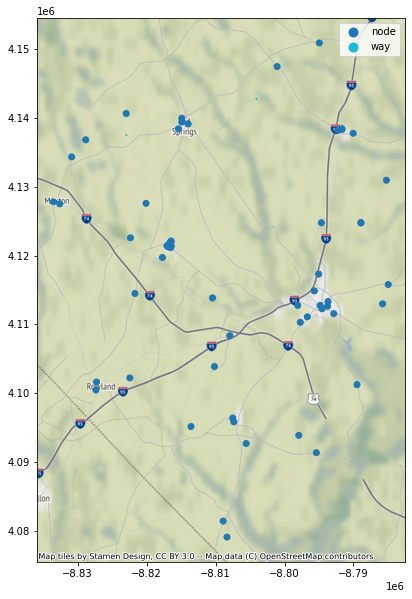

In [18]:
map = viz.plot_gdf_map(osm_schools,column='element_type', category=True)
print("Open Street Map School Data for Robeson County]")
map

In [19]:
# Check CRS
crs = osm_schools.crs
print(crs)

epsg:4326


C:\Users\nathanael99\Miniconda3\envs\pyincoreEnv20210506\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
from folium import plugins # Add minimap and search plugin functions to maps
from folium.map import *

def folium_marker_map(gdf,layername,popuplabel):
    """
    """
    
    # Check projection is epsg:4326
    
    # Find the bounds of the Census Block File
    minx = gdf.bounds.minx.min()
    miny = gdf.bounds.miny.min()
    maxx = gdf.bounds.maxx.max()
    maxy = gdf.bounds.maxy.max()

    map = fm.Map(location=[(miny+maxy)/2,(minx+maxx)/2], zoom_start=16)
    
    feature_group = FeatureGroup(name=layername)
    for idx, row in gdf.iterrows():
        # Get lat and lon of points
        lon = row['geometry'].centroid.x
        lat = row['geometry'].centroid.y

        # Get NAME information
        label = row[popuplabel]
        # Add marker to the map
        feature_group.add_child(Marker([lat, lon], 
                                    popup=label,
                                    icon=fm.Icon(color='blue', icon="school")))
    map.add_child(feature_group)
    fm.LayerControl(collapsed=False, autoZIndex=False).add_to(map)

    # Add minimap
    plugins.MiniMap().add_to(map)

    # How should the map be bound - look for the southwest and northeast corners of the data
    sw_corner = [gdf.bounds.miny.min(),gdf.bounds.minx.min()]
    ne_corner = [gdf.bounds.maxy.max(),gdf.bounds.maxx.max()]
    map.fit_bounds([sw_corner, ne_corner])

    return map

explore_map = folium_marker_map(osm_schools,'OSM Schools','name')
explore_map.save(f'{programname}/{programname}.html')

display(explore_map)

### Save Work

In [21]:
# Save Work at this point as CSV
savefile = sys.path[0]+"/"+programname+"/"+programname+"_EPSG4326.csv"
osm_schools.to_csv(savefile)